# Assignment 3: Linear Regression

Only use the already imported library `numpy` and the Python standard library. Make sure that the datasets `dataLinReg2D.txt`, `dataQuadReg2D.txt`, `dataQuadReg2D_noisy.txt` and `airfoil_self_noise.dat` are in the same directory as the notebook.

List your team members (name and immatriculation number) and indicate whether you are a B.Sc. Data Science or other group in the following cell:


Zhuo Zeng 3489547 M.Sc. Autonome Systeme
Jiaqi Qin 3493229 M.Sc. Autonome Systeme
Jiaqi Wu  3506048 M.Sc. Autonome Systeme

## Task 1: Ridge Regression for Polynomial 2D Functions

Each line in the data sets consists of a data entry `(x,y)` with a 2D point `x` and a 1D function output `y`.

In [86]:
# Load required packages and datasets. Do not modify.
import numpy as np


def load_dataset(path):
    data = np.loadtxt(path)
    X, y = data[:, :2], data[:, 2]
    
    return X, y
    

X_lin, y_lin = load_dataset("dataLinReg2D.txt")
X_quad, y_quad = load_dataset("dataQuadReg2D.txt")
X_noise, y_noise = load_dataset("dataQuadReg2D_noisy.txt")

1) Extend the `make_features` method to also compute quadratic features (`ftype = 'quad'`). You may also experiment with other feature transformations, e.g. third-order polynomials.

In [109]:
def make_features(X, ftype='lin'):
    n, d = X.shape
    
    if ftype == 'lin': # Linear feature transformation (including intercept)
        Phi = np.empty((n, d+1))
        Phi[:, 0] = 1
        Phi[:, 1:] = X
        
    elif ftype == 'quad':  # Quadratic feature transformation
        # Implement for task1 1.1.
        R = int(1+d+d*(d+1)/2)
        Phi = np.empty((n,R))
        Phi[:, 0] = 1
        Phi[:, 1:3] = X
        Phi[:, 3] = X[:, 0]**2
        Phi[:, 4] = X[:, 0]* X[:, 1]
        Phi[:, 5] = X[:, 1]**2
        pass
    
    elif ftype == 'nasa':
        # Implement for task 2.2.
        Phi = np.empty((n,d))
        Phi[:, 0] = 1 
        Phi[:, 1] = np.log(X[:, 0])
        Phi[:, 2] = np.log(np.cos((2*np.pi*X[:, 1] / 360)))
        Phi[:, 3:5] = np.log(X[:, 2:4])
        pass
    
    else:
        raise Exception('Feature type {} not implemented yet'.format(ftype))
    
    return Phi

2) Implement Ridge Regression to fit a polynomial function to the data sets with the regularization parameter `lambda_` and feature type `ftype`.

Fill out the methods in `RidgeRegression` to train (`fit`) and predict (`predict`). Feel free to introduce new fields and methods based on your needs, but the methods `fit` and `predict` are required and their interface should not be changed. You need to store the vector of regression coefficients in the field `self.beta`.

In [88]:
# Implement your solution here.
class RidgeRegression(object):
    def __init__(self, lambda_, ftype = 'lin'):
        self.lambda_ = lambda_
        self.ftype = ftype
        self.beta = None  # Learned regression coefficients.
    
    def fit(self, X, y):
        """
        X is an array of shape (n, d), 
            where n is the number of samples and d is the number of features.
        y is an array of shape (n,)
        """
        Phi = make_features(X, self.ftype)
        
        # Implement your solution here.
        self.beta = np.zeros(Phi.shape[1])
        XTX = Phi.T.dot(Phi)
        XTY = Phi.T.dot(y)
        m, _ = XTX.shape
        I = np.eye(m)
        self.beta = np.linalg.solve(XTX+self.lambda_*I,XTY)
        pass
    
    def predict(self, X):
        """
        X is an array with shape (n, d).
        The method returns an array of shape (n,).
        """
        Phi = make_features(X, self.ftype)
        
        # Implement your solution here.
        return Phi.dot(self.beta)

3) Implement the function `MSE` to compute the mean squared error. `y_pred` and `y_true` are the vectors of predicted and true function outputs respectively with shape `(n,)`, where `n` is the number of samples. The function returns a single float.

In [89]:
def MSE(y_pred, y_true):
    # Implement your solution here.
    Error = []
    squaredError = []
    for i in range(y_true.shape[0]):
        Error = y_pred[i] - y_true[i]
        squaredError.append(Error**2)
    mse = float(np.sum(squaredError)/len(squaredError)) 
    
    return mse

4) Evaluate your Ridge Regression model with linear features on the linear `(X_lin, y_lin)` data set. Try to find a good `lambda_`. How does it perform with quadratic features on this data set? Report the MSE on the full data set when trained on the full data set. (Ideally, repeat this for different Ridge regularization parameters `lambda_` and generate a nice bar plot of the MSE for various `lambda_`.)

MSE: 0.010251108682211327


<IPython.core.display.Javascript object>


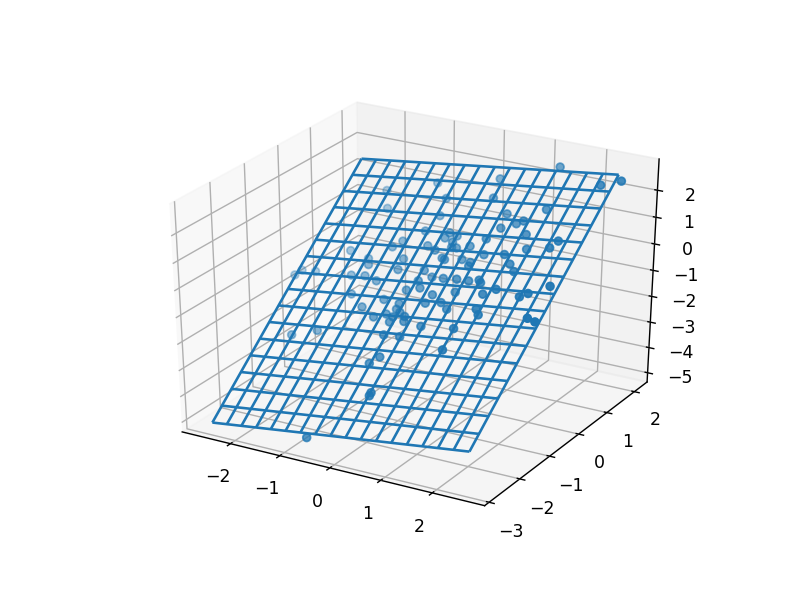

MSE with linear features on the linear data set:
[0.01024801280165061, 0.010248224053289363, 0.010249857314081803, 0.010262451902467004, 0.010358877148086807, 0.01108267990276537, 0.01623484016357535, 0.04827838492733827, 0.19569468387353278, 0.5949092533289886]
MSE with quadratic features on the linear data set:
[0.009745520608016775, 0.009745782103720345, 0.009747802469220489, 0.009763353373242073, 0.009881810749134055, 0.010759048257018526, 0.01679661757061157, 0.05179185184008211, 0.19734814322941252, 0.5664793975569241]


<IPython.core.display.Javascript object>


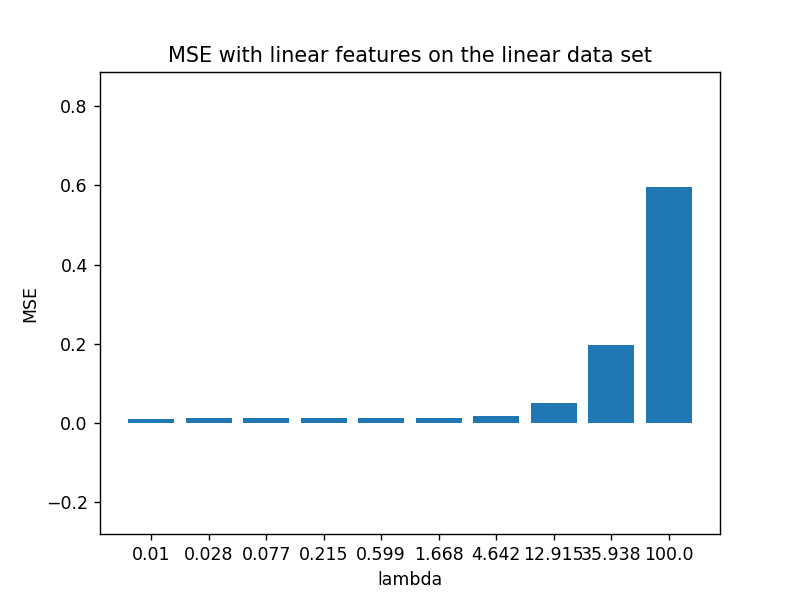

<IPython.core.display.Javascript object>


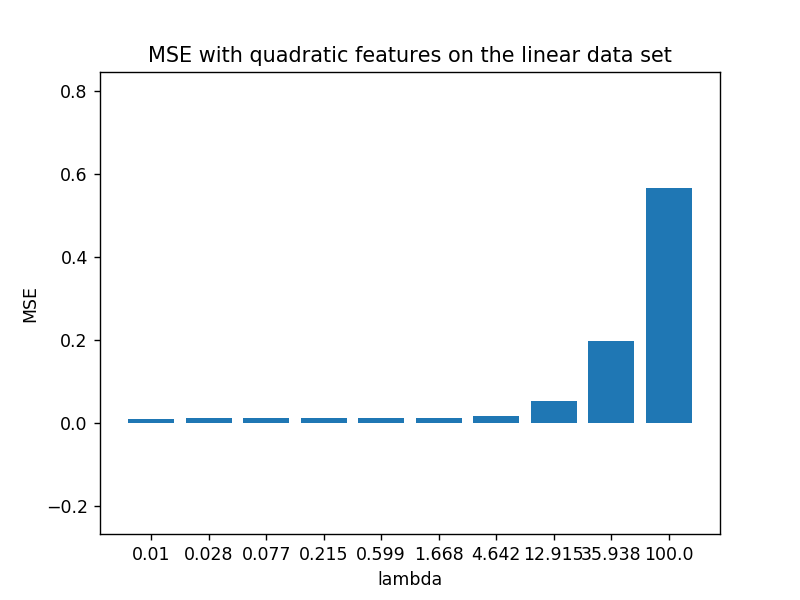

In [90]:
def train_evaluate(regression_model, X, y):
    regression_model.fit(X, y)
    yhat = regression_model.predict(X)
    print('MSE:', MSE(yhat, y))

    
def plot_data_and_model(regression_model, X, y):
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d.axes3d import Axes3D
    %matplotlib notebook
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection = '3d')
    ax.scatter(X[:, 0], X[:, 1], y, marker = 'o')
    
    xmin = X.min(0)
    xmax = X.max(0)

    x0grid, x1grid = np.mgrid[xmin[0]:xmax[0]:.3, xmin[1]:xmax[1]:.3]

    xdim0, xdim1 = np.shape(x0grid)
    xsize = np.size(x0grid)

    x0hat = x0grid.flatten()
    x1hat = x1grid.flatten()
    x0hat = x0hat.reshape((np.size(x0hat), 1))
    x1hat = x1hat.reshape((np.size(x1hat), 1))
    xhat = np.append(x0hat, x1hat, 1)
    xhatfv = make_features(xhat, regression_model.ftype)
    yhat = xhatfv.dot(regression_model.beta)
    ygrid = yhat.reshape((xdim0, xdim1))
    ax.plot_wireframe(x0grid, x1grid, ygrid)
    ax.auto_scale_xyz([xmin[0], xmax[0]], [xmin[1], xmax[1]], [y.min(), y.max()])
    fig.show()

# Implement your solution here.
regression_lin = RidgeRegression(lambda_=0.1, ftype='lin')
train_evaluate(regression_lin, X_lin, y_lin)

# If the plot doesn't show the first time, run this cell again
plot_data_and_model(regression_lin, X_lin, y_lin)

#This function returns MSE
def return_train_evaluate(regression_model,X,y):
    regression_model.fit(X, y)
    yhat = regression_model.predict(X)
    return MSE(yhat, y)

lambda_ = np.logspace(-2,2,10)

##MSE With linear features on the linear data set
MSE_lin_lin = []
for i in lambda_:
    regression_lin =  RidgeRegression(i, ftype='lin')
    MSE_lin_lin.append(return_train_evaluate(regression_lin,X_lin,y_lin))
print("MSE with linear features on the linear data set:")
print(MSE_lin_lin)

#MSE WITH quadratic features on the linear data set
MSE_quad_lin = []
for i in lambda_:
    regression_quad =  RidgeRegression(i, ftype='quad')
    MSE_quad_lin.append(return_train_evaluate(regression_quad,X_lin,y_lin))
print("MSE with quadratic features on the linear data set:")
print(MSE_quad_lin)

#generate a nice bar plot of the MSE for various lambda_
def bar_plot(MSE,lambda_,title):
    import matplotlib.pyplot as plt
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_xlabel("lambda")
    ax.set_ylabel("MSE")
    ax.set_title(title)
    ax.bar(np.arange(lambda_.shape[0]),MSE)
    ax.set_ylim((MSE.min()-0.5*(MSE.max()-MSE.min())), MSE.max()+0.5*(MSE.max()-MSE.min()))
    plt.xticks(np.arange(lambda_.shape[0]), np.around(lambda_, 3).tolist())

MSE_lin_lin = np.array(MSE_lin_lin)
bar_plot(MSE_lin_lin,lambda_,"MSE with linear features on the linear data set")
MSE_quad_lin = np.array(MSE_quad_lin)
bar_plot(MSE_quad_lin,lambda_,"MSE with quadratic features on the linear data set")


Both MSE with linear and quadratic features on the linear data set are small. Because the linear data set has linear features and quadratic features include linear features.

While lambda increases, MSE increases. Because when lambda is bigger, the error is bigger. That means MSE is bigger.

5) Try to find a good model (including features and suitable `lambda_` parameters) for the quadratic data set `(X_quad, y_quad)`. Report the MSE on the full data set when trained on the full data set.  (Ideally, repeat this for different Ridge regularization parameters `lambda_` and generate a nice bar plot of the MSE for various `lambda_`.) Also plot your predicted model using the method above `plot_data_and_model`.

MSE: 0.011885151051852377


<IPython.core.display.Javascript object>


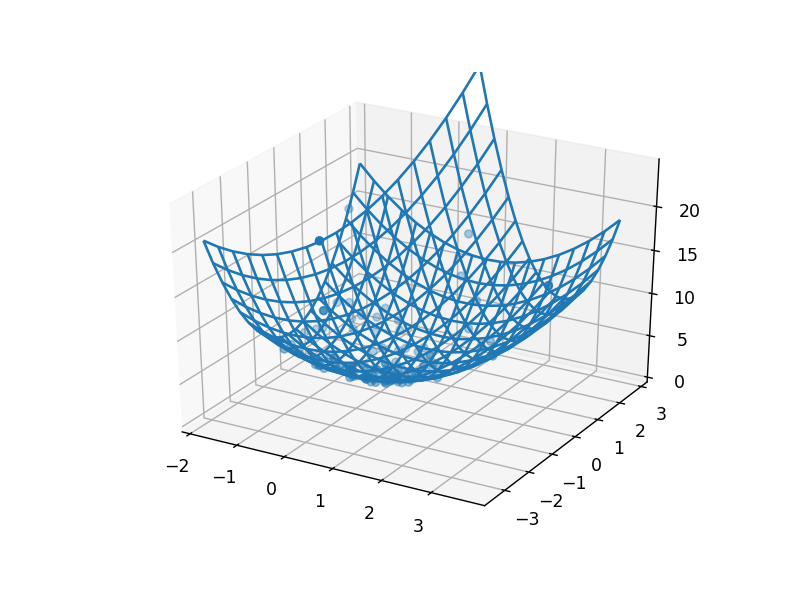

MSE with linear features on the quadratic data set:
[12.236250117814407, 12.236251190778683, 12.236259489413278, 12.236323550714566, 12.236815450224015, 12.240537565402246, 12.267602590738612, 12.444985697126715, 13.354360828041422, 16.253457175930258]
MSE with quadratic features on the quadratic data set:
[0.011882832053357727, 0.011882990195948517, 0.011884213432802207, 0.01189365869303446, 0.011966240554320957, 0.01251677688271608, 0.016554375142558177, 0.04395471565138646, 0.20545980927770352, 0.9956570805620291]


<IPython.core.display.Javascript object>


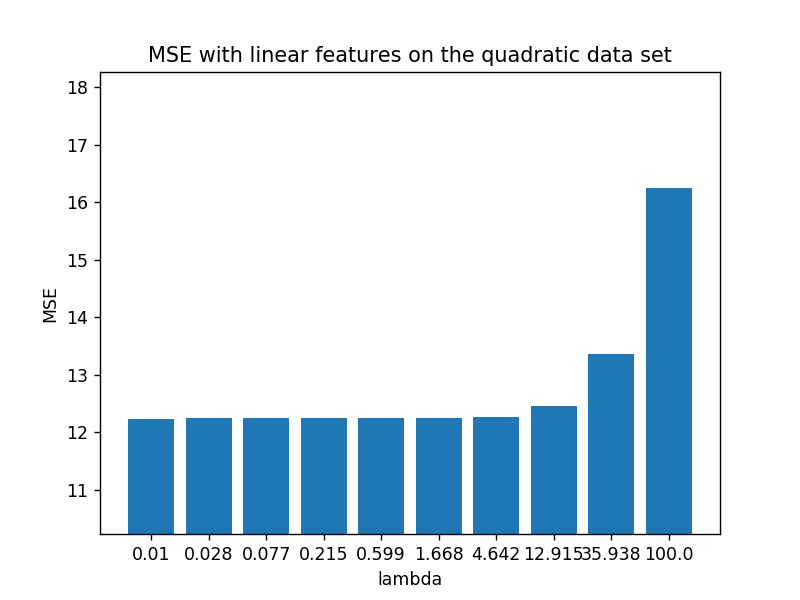

<IPython.core.display.Javascript object>


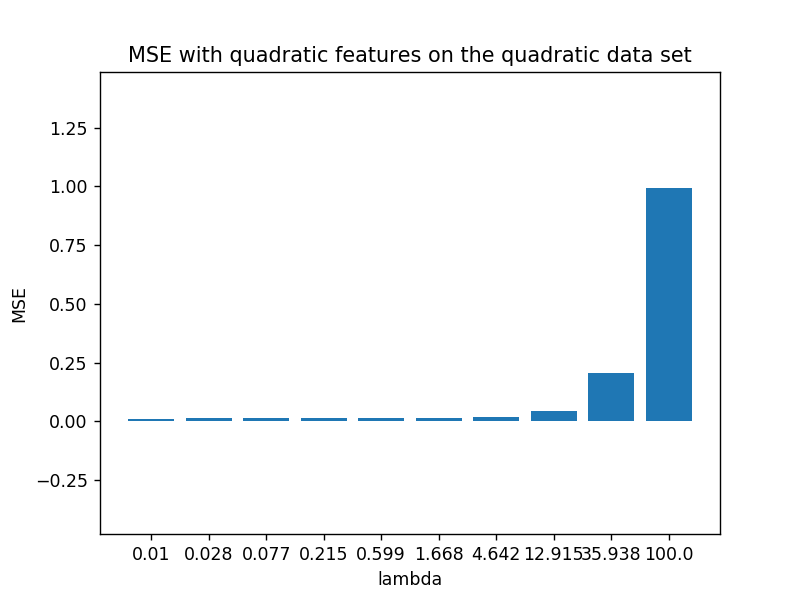

In [91]:
# Implement your model tests here using the quadratic data set
regression_quad = RidgeRegression(lambda_=0.1, ftype='quad')
train_evaluate(regression_quad,X_quad,y_quad)
plot_data_and_model(regression_quad,X_quad,y_quad)

#MSE with linear features on the quadratic data set
MSE_lin_quad = []
for i in lambda_:
    regression_lin =  RidgeRegression(i, ftype='lin')
    MSE_lin_quad.append(return_train_evaluate(regression_lin,X_quad,y_quad))
print("MSE with linear features on the quadratic data set:")
print(MSE_lin_quad)
#MSE with quadratic features on the quadratic data set
MSE_quad_quad = []
for i in lambda_:
    regression_quad =  RidgeRegression(i, ftype='quad')
    MSE_quad_quad.append(return_train_evaluate(regression_quad,X_quad,y_quad))
print("MSE with quadratic features on the quadratic data set:")
print(MSE_quad_quad)

MSE_lin_quad = np.array(MSE_lin_quad)
bar_plot(MSE_lin_quad,lambda_,"MSE with linear features on the quadratic data set")
MSE_quad_quad = np.array(MSE_quad_quad)
bar_plot(MSE_quad_quad,lambda_,"MSE with quadratic features on the quadratic data set")


MSE with linear features on the quadratic data set are big.
While MSE with quadratic features on the quadratic data set are still small. 
Because the quadratic data set has quadratic features, which linear features cant completely show. 

6) Try to find a good model (including features and suitable `lambda_` parameters) for the noisy data set `(X_noise, y_noise)`. Report the MSE on the full data set when trained on the full data set.  (Ideally, repeat this for different Ridge regularization parameters `lambda_` and generate a nice bar plot of the MSE for various `lambda_`.) Also plot your predicted model using the method above `plot_data_and_model`.

MSE: 39.9552557016624


<IPython.core.display.Javascript object>


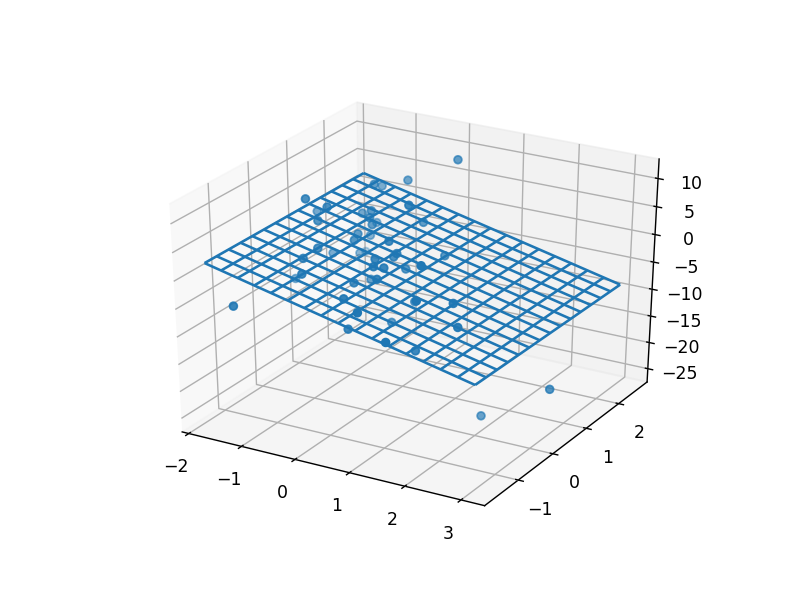

MSE with linear features on the quadratic data set:
[39.95522664563302, 39.95522863033134, 39.95524396267815, 39.955361937946265, 39.956259765285665, 39.9628907600234, 40.008155331470306, 40.263530734595605, 41.238221172504446, 43.25477532037534]
MSE with linear features on the quadratic data set:
[28.057812191159993, 28.057815065229832, 28.05783722817644, 28.058006914110784, 28.059280881039886, 28.06836161768709, 28.12535661650743, 28.40141250115016, 29.331716998606463, 31.679035529724594]


<IPython.core.display.Javascript object>


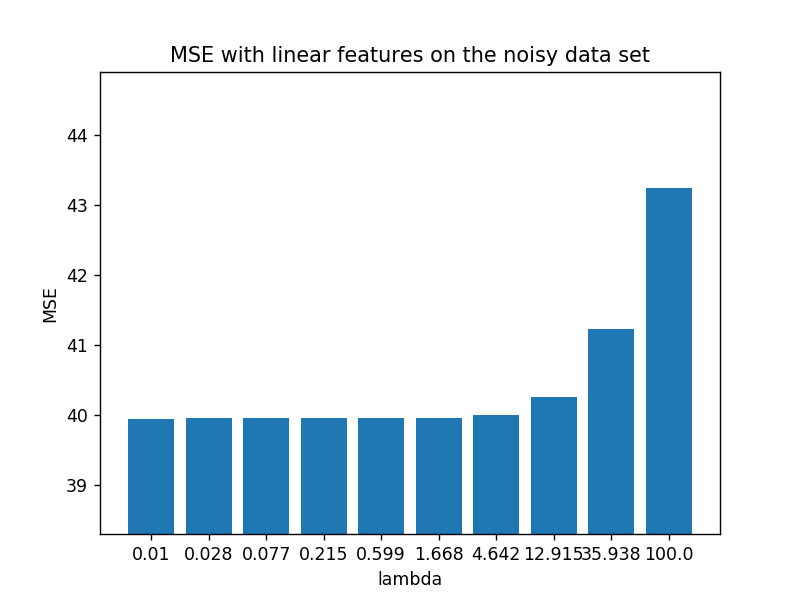

<IPython.core.display.Javascript object>


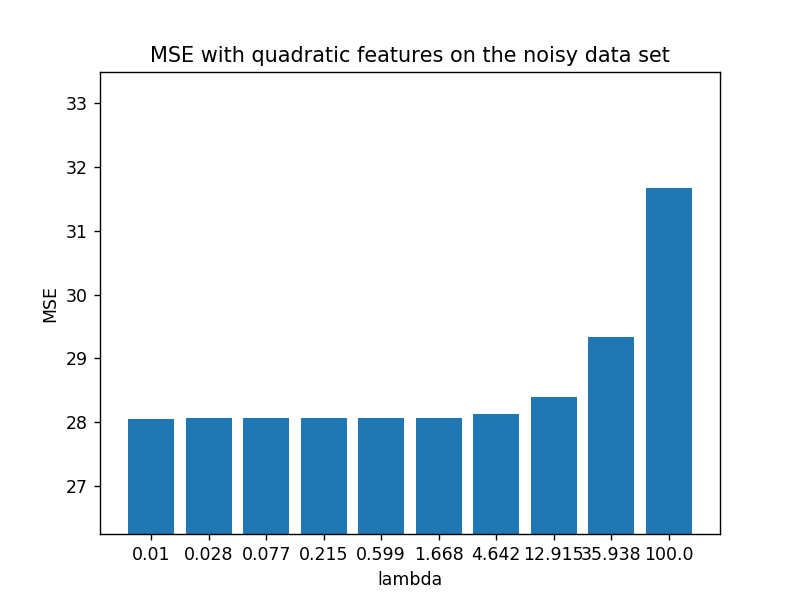

In [92]:
# Implement your model tests here using the noisy data set
regression_noise = RidgeRegression(lambda_=0.1, ftype='lin')
train_evaluate(regression_noise, X_noise, y_noise)
plot_data_and_model(regression_noise, X_noise, y_noise)

#MSE with linear features on the noisy data set
MSE_lin_noise = []
for i in lambda_:
    regression_lin =  RidgeRegression(i, ftype='lin')
    MSE_lin_noise.append(return_train_evaluate(regression_lin,X_noise,y_noise))
print("MSE with linear features on the quadratic data set:")
print(MSE_lin_noise)

MSE_quad_noise = []
for i in lambda_:
    regression_quad =  RidgeRegression(i, ftype='quad')
    MSE_quad_noise.append(return_train_evaluate(regression_quad,X_noise,y_noise))
print("MSE with linear features on the quadratic data set:")
print(MSE_quad_noise)

MSE_lin_noise = np.array(MSE_lin_noise)
bar_plot(MSE_lin_noise,lambda_,"MSE with linear features on the noisy data set")
MSE_quad_noise = np.array(MSE_quad_noise)
bar_plot(MSE_quad_noise,lambda_,"MSE with quadratic features on the noisy data set")

Both MSE with linear features and quadratic features on the noisy data set are big. Because the noisy data set has neither linear features nor quadratic features.

## Task 2: Airfoil Self-Noise Prediction

The air self-noise dataset is a [dataset by NASA](https://archive.ics.uci.edu/ml/datasets/Airfoil+Self-Noise). Your task is to find a good feature mapping for ridge regression to achieve the lowest possible prediction error.

1) Explain the content of the dataset in few words. What are the input features? What is the output?


NASA data set, obtained from a series of aerodynamic and acoustic tests of two and three-dimensional airfoil blade sections conducted in an anechoic wind tunnel.

5 input features:
1. Frequency, in Hertzs.
2. Angle of attack, in degrees.
3. Chord length, in meters.
4. Free-stream velocity, in meters per second.
5. Suction side displacement thickness, in meters.

The only output is:
1. Scaled sound pressure level, in decibels.




In [93]:
def load_dataset(path):
    data = np.genfromtxt(path)
    X, y = data[:, :5], data[:, 5]
    
    return X, y
    

X, y = load_dataset('airfoil_self_noise.csv')

2) Implement the option `ftype = 'nasa'` in the `make_features` function. You should try any type of non-linear features and interactions between features. You are not restricted to the feature mapping presented in the lecture. It is helpful to think about the domain and characteristics of the features, e.g. how do you work with periodic features.

Explain the choice of your features:

Because the only output is pressure in decibels(dB).So maybe we can try logarithmic function.
pressure = force/area = force*displacement/area*displacement = energy/volume
energy = 0.5*mass*(linear_velocity^2) + 0.5*mass*(radius^2)*(angular_velocity^2)
when we use logarithmic function then we can transfer this non-linear features into linear features, it may works.

3) Evaluate your Ridge Regression model with your chosen features on the data set. Try to find a good `lambda_`. Report the MSE on the full data set when trained on the full data set. (Ideally, repeat this for different Ridge regularization parameters `lambda_` and generate a nice bar plot of the MSE for various `lambda_`.)

MSE on the nasa data set:
[24.739431881796662, 24.881316351254295, 25.5687963704037, 27.741777164716098, 31.79971975496791, 38.61381209744016, 53.19678753473545, 75.92819370889542, 96.30259450057564, 113.57196280042906]


<IPython.core.display.Javascript object>


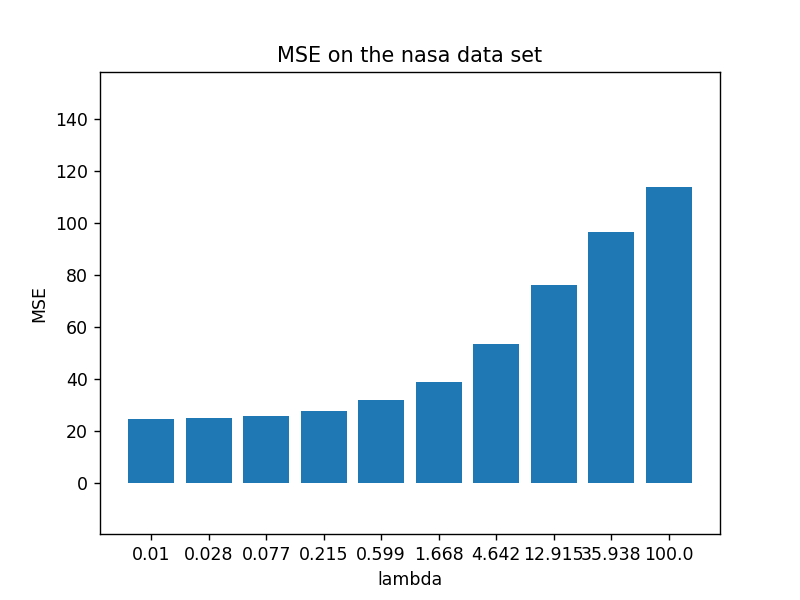

In [107]:
def train_evaluate(regression_model, X, y):
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2020)
    
    regression_model.fit(X_train, y_train)
    yhat_test = regression_model.predict(X_test)
    #print('MSE:', MSE(yhat_test, y_test))
    return MSE(yhat_test, y_test)


#your_regression = RidgeRegression(lambda_=0.1, ftype='nasa')
#train_evaluate(your_regression, X, y)

MSE_nasa = []
for i in lambda_:
    your_regression = RidgeRegression(i, ftype='nasa')
    MSE_nasa.append(train_evaluate(your_regression,X,y))
print("MSE on the nasa data set:")
print(MSE_nasa)
MSE_nasa = np.array(MSE_nasa)
bar_plot(MSE_nasa, lambda_, "MSE on the nasa data set")

While lambda increases, MSE increases. This result is same with the previous observation. But MSE are very big, so this feature works not well. 

**For all students other than B.Sc. Data Science:**

4) Implement the function `cross_validation` to evaluate the prediction error of your model. Report the mean squared error from cross-validation. (Ideally, repeat this for different Ridge regularization parameters `lambda_` and generate a nice bar plot of the MSE for various `lambda_`.)

In [115]:
def cross_validation(regression_model, X, y):
    n = 10
    mini_batch = int(X.shape[0]/n)
    MSE_cross_validation = []
    for i in range(n):
        varr = np.array((i*mini_batch,(i+1)*mini_batch))
        X_train,X_test = np.split(X, varr)
        y_train,y_test = np.split(y, varr)
        regression_model.fit(X_train, y_train)
        yhat_test = regression_model.predict(X_test)
        MSE_cross_validation.append(MSE(yhat_test, y_test))
    return MSE_cross_validation
    pass

#your_regression = RidgeRegression(lambda_=0.1, ftype='nasa')
#cross_validation(your_regression, X, y)

==> *Write your observations here and report your results.* (double klick here to edit)